# Network Intrusion Detection System Using Various Machine Learning Techniques
Information Security Management

Feature Information: https://docs.google.com/spreadsheets/d/1oAx320Vo9Z6HrBrL6BcfLH6sh2zIk9EKCv2OlaMGmwY/edit#gid=0

Dataset link: http://unb.ca/cic/datasets/nsl.html


## Reading the data sets and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
columns = ['Duration','Protocol Type',
'Service',
'Flag',
'Src Bytes',
'Dst Bytes',
'Land',
'Wrong Fragment',
'Urgent',
'Hot',
'Num Failed Logins',
'Logged In',
'Num Compromised',
'Root Shell',
'Su Attempted',
'Num Root',
'Num File Creations',
'Num Shells',
'Num Access Files',
'Num Outbound Cmds',
'Is Hot Logins',
'Is Guest Login',
'Count',
'Srv Count',
'Serror Rate',
'Srv Serror Rate',
'Rerror Rate',
'Srv Rerror Rate',
'Same Srv Rate',
'Diff Srv Rate',
'Srv Diff Host Rate',
'Dst Host Count',
'Dst Host Srv Count',
'Dst Host Same Srv Rate',
'Dst Host Diff Srv Rate',
'Dst Host Same Src Port Rate',
'Dst Host Srv Diff Host Rate',
'Dst Host Serror Rate',
'Dst Host Srv Serror Rate',
'Dst Host Rerror Rate',
'Dst Host Srv Rerror Rate',
'Class',
'Difficulty Level']

In [3]:
len(columns)

43

In [4]:
train = pd.read_csv('KDDTrain+.txt', header=None,names=columns)
test = pd.read_csv('KDDTest+.txt', header=None,names=columns)
train

,Duration,Protocol Type,Service,Flag,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Class,Difficulty Level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
train.iloc[:,41].value_counts(dropna=False)

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: Class, dtype: int64

In [6]:
test.iloc[:,41].value_counts(dropna=False)

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
perl                  2
udpstorm              2
loadmodule            2
worm                  2
phf                   2
sqlattack             2
imap                  1
Name: Class, dtype: int64

## Data Cleaning and Visualization
Our aim here is to check whether an intrusion is detected or not. We do not go deeper into the classification of the attacks. Thus, we add a 'target' column which maps label 'normal' to 0 and any intrusion as 1. We then plot a pie chart to visualize this distribution.

In [7]:
train['target'] = train.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
test['target'] = test.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
data = train['target'].value_counts()
lab = ['normal','attack']
data 

0    67343
1    58630
Name: target, dtype: int64

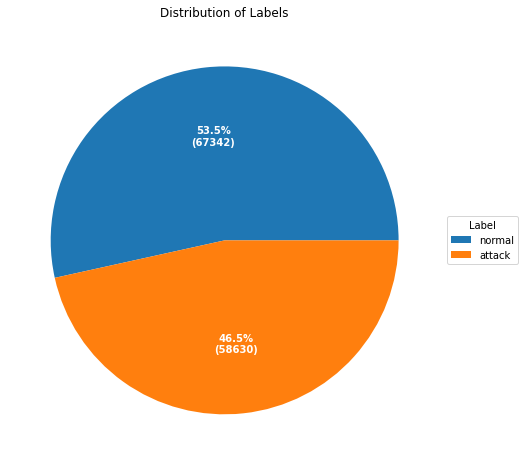

In [8]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Labels")

plt.show()

Now we move on to the distribution of the 4 classes of attacks.

In [9]:
DOS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','upstorm','worm']
Probe = ['ipsweep','nmap','mscan','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','Snmpgetattack','spy','snmpguess','warzclient','warzmaster','xlock','xsnoop']
count = {'DOS':0, 'Probe':0, 'U2R':0, 'R2L':0}
for attack in train['Class']:
    if attack in DOS:
        count['DOS'] += 1
    elif attack in Probe:
        count['Probe'] += 1
    elif attack in U2R:
        count['U2R'] += 1
    elif attack in R2L:
        count['R2L'] += 1
count

{'DOS': 45927, 'Probe': 11656, 'U2R': 52, 'R2L': 85}

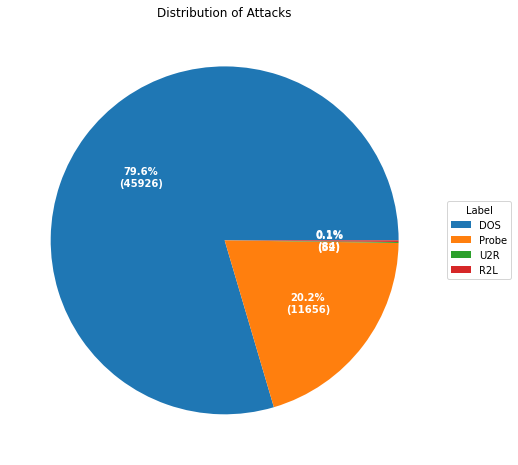

[45927, 11656, 52, 85]

In [10]:
data = list(count.values())
lab = list(count.keys())
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Attacks")

plt.show()
data

Column 42 (Difficulty Level), specifies the severity of the attack. For the intrusion detection system, the severity of an attack is irrelevant as any attack can be severe. It does not help in classifying whether there was an attack or not, or which type of attack was observed. Thus the column 42 is removed from the data.<br>

Initially, the model is supposed to detect whether there has been an attack or not (detection). Only then should it learn to classify the attacks. Thus the column 41 is removed for the initial model.

In [11]:
train.drop(columns=['Class','Difficulty Level'], inplace=True)
test.drop(columns=['Class','Difficulty Level'], inplace=True)
train

,Duration,Protocol Type,Service,Flag,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


All the columns that are textual i.e. strings, are encoded to numerics for the understanding of the model. Since all the models applied cannot inherently handle textual data. A `OnehotEncoder` is applied on these columns.

In [12]:
train['Protocol Type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [13]:
train['Service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [14]:
train['Flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
enc = OneHotEncoder()

In [17]:
enc.fit(train[['Protocol Type','Service','Flag']])

OneHotEncoder()

In [18]:
train_OHE = train.join(pd.DataFrame(enc.transform(train[['Protocol Type','Service','Flag']]).toarray()))

In [19]:
train_OHE.drop(columns=['Protocol Type','Service','Flag'], inplace=True)
train_OHE

,Duration,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,Num Failed Logins,Logged In,Num Compromised,...,74,75,76,77,78,79,80,81,82,83
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
test_OHE = test.join(pd.DataFrame(enc.transform(test[['Protocol Type','Service','Flag']]).toarray()))

In [21]:
test_OHE.drop(columns=['Protocol Type','Service','Flag'], inplace=True)
test_OHE

,Duration,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,Num Failed Logins,Logged In,Num Compromised,...,74,75,76,77,78,79,80,81,82,83
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0,317,938,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0,42,42,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
X_train = train_OHE.drop('target',axis=1)
y_train = train_OHE['target']

In [23]:
X_test = test_OHE.drop('target',axis=1)
y_test = test_OHE['target']

In [24]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 122 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Duration                     int64  
 1   Src Bytes                    int64  
 2   Dst Bytes                    int64  
 3   Land                         int64  
 4   Wrong Fragment               int64  
 5   Urgent                       int64  
 6   Hot                          int64  
 7   Num Failed Logins            int64  
 8   Logged In                    int64  
 9   Num Compromised              int64  
 10  Root Shell                   int64  
 11  Su Attempted                 int64  
 12  Num Root                     int64  
 13  Num File Creations           int64  
 14  Num Shells                   int64  
 15  Num Access Files             int64  
 16  Num Outbound Cmds            int64  
 17  Is Hot Logins                int64  
 18  Is Guest Login               int64  
 19  C

In [25]:
X_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 122 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Duration                     int64  
 1   Src Bytes                    int64  
 2   Dst Bytes                    int64  
 3   Land                         int64  
 4   Wrong Fragment               int64  
 5   Urgent                       int64  
 6   Hot                          int64  
 7   Num Failed Logins            int64  
 8   Logged In                    int64  
 9   Num Compromised              int64  
 10  Root Shell                   int64  
 11  Su Attempted                 int64  
 12  Num Root                     int64  
 13  Num File Creations           int64  
 14  Num Shells                   int64  
 15  Num Access Files             int64  
 16  Num Outbound Cmds            int64  
 17  Is Hot Logins                int64  
 18  Is Guest Login               int64  
 19  Cou

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train.columns.to_numpy()

array(['Duration', 'Src Bytes', 'Dst Bytes', 'Land', 'Wrong Fragment',
       'Urgent', 'Hot', 'Num Failed Logins', 'Logged In',
       'Num Compromised', 'Root Shell', 'Su Attempted', 'Num Root',
       'Num File Creations', 'Num Shells', 'Num Access Files',
       'Num Outbound Cmds', 'Is Hot Logins', 'Is Guest Login', 'Count',
       'Srv Count', 'Serror Rate', 'Srv Serror Rate', 'Rerror Rate',
       'Srv Rerror Rate', 'Same Srv Rate', 'Diff Srv Rate',
       'Srv Diff Host Rate', 'Dst Host Count', 'Dst Host Srv Count',
       'Dst Host Same Srv Rate', 'Dst Host Diff Srv Rate',
       'Dst Host Same Src Port Rate', 'Dst Host Srv Diff Host Rate',
       'Dst Host Serror Rate', 'Dst Host Srv Serror Rate',
       'Dst Host Rerror Rate', 'Dst Host Srv Rerror Rate', 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5

In [29]:
cols_to_be_scaled = ['Duration', 'Src Bytes', 'Dst Bytes', 'Wrong Fragment',
       'Urgent', 'Hot', 'Num Failed Logins',
       'Num Compromised', 'Su Attempted', 'Num Root',
       'Num File Creations', 'Num Shells', 'Num Access Files',
       'Num Outbound Cmds', 'Count',
       'Srv Count', 'Serror Rate', 'Srv Serror Rate', 'Rerror Rate',
       'Srv Rerror Rate', 'Same Srv Rate', 'Diff Srv Rate',
       'Srv Diff Host Rate', 'Dst Host Count', 'Dst Host Srv Count',
       'Dst Host Same Srv Rate', 'Dst Host Diff Srv Rate',
       'Dst Host Same Src Port Rate', 'Dst Host Srv Diff Host Rate',
       'Dst Host Serror Rate', 'Dst Host Srv Serror Rate',
       'Dst Host Rerror Rate', 'Dst Host Srv Rerror Rate']

In [30]:
scaler.fit(X_train[cols_to_be_scaled])

MinMaxScaler()

In [31]:
scaled_X_train_cols = pd.DataFrame(scaler.transform(X_train[cols_to_be_scaled]),columns=cols_to_be_scaled)

In [32]:
X_train.drop(cols_to_be_scaled,inplace=True,axis=1)

In [33]:
X_train = X_train.join(scaled_X_train_cols)

In [34]:
X_train

,Land,Logged In,Root Shell,Is Hot Logins,Is Guest Login,0,1,2,3,4,...,Dst Host Count,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate
0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [35]:
scaled_X_test_cols = pd.DataFrame(scaler.transform(X_test[cols_to_be_scaled]),columns=cols_to_be_scaled)

In [36]:
X_test.drop(cols_to_be_scaled,inplace=True,axis=1)

In [37]:
X_test = X_test.join(scaled_X_test_cols)

In [38]:
X_test

,Land,Logged In,Root Shell,Is Hot Logins,Is Guest Login,0,1,2,3,4,...,Dst Host Count,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate
0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.113725,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.392157,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.772549,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,1.000000,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


The following are the models which will be trained and compared for the intrusion detection problem statement.
    
  * Random Forest classifier
  * Logistic Regression
  * Gaussian Naive Bayes
  * Gradient Boosting classifier
  * Multi-Layer Perceptron classifier
  


## Random Forest

In [39]:
rf_mod = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
rf_mod.fit(X_train, y_train)

print("Train score: ",rf_mod.score(X_train, y_train))

pred_rf = rf_mod.predict(X_test)
print('Test score:',rf_mod.score(X_test, y_test))

print(classification_report(pred_rf,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_rf))
print("Average weighted recall: ",recall_score(y_test,pred_rf))
print("Average weighted f1 score: ",f1_score(y_test,pred_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  0.9998412358203742


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test score: 0.7673438608942512
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     14432
           1       0.61      0.97      0.75      8112

    accuracy                           0.77     22544
   macro avg       0.79      0.81      0.77     22544
weighted avg       0.84      0.77      0.77     22544

Average weighted precision:  0.9677021696252466
Average weighted recall:  0.6117042001090938
Average weighted f1 score:  0.7495822391978992


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished


## Logistic Regression

In [40]:
lg_mod = LogisticRegression()
lg_mod.fit(X_train, y_train)

print("Train score: ",lg_mod.score(X_train, y_train))

pred_lg = lg_mod.predict(X_test)
print('Test score:',lg_mod.score(X_test, y_test))

print(classification_report(pred_lg,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_lg))
print("Average weighted recall: ",recall_score(y_test,pred_lg))
print("Average weighted f1 score: ",f1_score(y_test,pred_lg))

Train score:  0.9727798814031579
Test score: 0.7539921930447125
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     13813
           1       0.62      0.92      0.74      8731

    accuracy                           0.75     22544
   macro avg       0.77      0.78      0.75     22544
weighted avg       0.81      0.75      0.76     22544

Average weighted precision:  0.9173061504982247
Average weighted recall:  0.6240941323151251
Average weighted f1 score:  0.7428120942311258


## Gaussian Naive Bayes

In [41]:
gnb_mod = GaussianNB()
gnb_mod.fit(X_train, y_train)

print("Train score: ",gnb_mod.score(X_train, y_train))

pred_nb = gnb_mod.predict(X_test)
print('Test score:',gnb_mod.score(X_test, y_test))

print(classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Train score:  0.8570407944559548
Test score: 0.5651614620298083
              precision    recall  f1-score   support

           0       0.99      0.50      0.66     19388
           1       0.24      0.98      0.39      3156

    accuracy                           0.57     22544
   macro avg       0.62      0.74      0.53     22544
weighted avg       0.89      0.57      0.62     22544

Average weighted precision:  0.9800380228136882
Average weighted recall:  0.24101924725317542
Average weighted f1 score:  0.38689098755394336


## Gradient Boosting

In [42]:
gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(X_train, y_train)

print("Train score: ",gb_mod.score(X_train, y_train))

pred_gb = gb_mod.predict(X_test)
print('Test score:',gb_mod.score(X_test, y_test))

print(classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Train score:  0.9961817214799997
Test score: 0.796708658623137
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     13356
           1       0.68      0.95      0.79      9188

    accuracy                           0.80     22544
   macro avg       0.82      0.82      0.80     22544
weighted avg       0.84      0.80      0.80     22544

Average weighted precision:  0.9489551589029168
Average weighted recall:  0.67942024468168
Average weighted f1 score:  0.791880477725807


## Multi-Layer Perceptron

In [43]:
mlp_mod = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_mod.fit(X_train, y_train)

print("Train score: ",mlp_mod.score(X_train, y_train))

pred_mlp = mlp_mod.predict(X_test)
print('Test score:',mlp_mod.score(X_test, y_test))

print(classification_report(pred_mlp,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_mlp))
print("Average weighted recall: ",recall_score(y_test,pred_mlp))
print("Average weighted f1 score: ",f1_score(y_test,pred_mlp))

Train score:  0.9982377176061537
Test score: 0.8101490418736693
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     12591
           1       0.72      0.93      0.81      9953

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.84      0.81      0.81     22544

Average weighted precision:  0.9296694463980709
Average weighted recall:  0.7210317151094834
Average weighted f1 score:  0.8121653646976215


## Feature selection methods: Mutual information gain and Chi square test 

In [114]:
import scipy.stats as stats
from scipy.stats import chi2

In [123]:
def chi2_test(dataset_table):
    Observed_Values = dataset_table.values
    val=stats.chi2_contingency(dataset_table)
    Expected_Values=val[3]
    no_of_rows=len(dataset_table.iloc[0:2,0])
    no_of_columns=len(dataset_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    alpha = 0.05
    
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    

In [119]:
protocol_type_table=pd.crosstab(train['Protocol Type'],train['target'])
print(protocol_type_table)

target             0      1
Protocol Type              
icmp            1309   6982
tcp            53600  49089
udp            12434   2559


In [120]:
service_table=pd.crosstab(train['Service'],train['target'])
print(service_table)

target       0    1
Service            
IRC        186    1
X11         67    6
Z39_50       0  862
aol          0    2
auth       236  719
...        ...  ...
urp_i      599    3
uucp         0  780
uucp_path    0  689
vmnet        0  617
whois        0  693

[70 rows x 2 columns]


In [121]:
flag_table=pd.crosstab(train['Flag'],train['target'])
print(flag_table)

target      0      1
Flag                
OTH        11     35
REJ      2693   8540
RSTO      219   1343
RSTOS0      0    103
RSTR      146   2275
S0        354  34497
S1        361      4
S2        119      8
S3         45      4
SF      63393  11552
SH          2    269


In [125]:
chi2_test(protocol_type_table)

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [127]:
chi2_test(service_table)

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [126]:
chi2_test(flag_table)

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [152]:
from sklearn.feature_selection import mutual_info_classif as MIC, SelectKBest

In [155]:
fs_mic = SelectKBest(score_func=mutual_info_classif,k='all')

In [156]:
fs_mic.fit(X_train,y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000001C08313BB70>)

In [157]:
for i in range(len(fs_mic.scores_)):
    print('Feature %d: %f' % (i, fs_mic.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.286092
Feature 2: 0.003043
Feature 3: 0.000476
Feature 4: 0.001073
Feature 5: 0.021750
Feature 6: 0.011171
Feature 7: 0.024892
Feature 8: 0.000000
Feature 9: 0.000377
Feature 10: 0.003959
Feature 11: 0.000000
Feature 12: 0.000172
Feature 13: 0.005542
Feature 14: 0.005833
Feature 15: 0.002329
Feature 16: 0.000756
Feature 17: 0.004296
Feature 18: 0.001470
Feature 19: 0.002086
Feature 20: 0.048836
Feature 21: 0.001445
Feature 22: 0.016342
Feature 23: 0.012811
Feature 24: 0.001966
Feature 25: 0.000926
Feature 26: 0.001627
Feature 27: 0.002591
Feature 28: 0.004928
Feature 29: 0.004838
Feature 30: 0.000000
Feature 31: 0.000878
Feature 32: 0.186603
Feature 33: 0.000000
Feature 34: 0.002242
Feature 35: 0.000518
Feature 36: 0.002614
Feature 37: 0.006598
Feature 38: 0.005377
Feature 39: 0.001649
Feature 40: 0.001631
Feature 41: 0.004043
Feature 42: 0.004408
Feature 43: 0.003182
Feature 44: 0.001853
Feature 45: 0.006521
Feature 46: 0.004108
Feature 47: 0.000000
Fe

In [169]:
selector = SelectKBest(mutual_info_classif, k =61)
selector.fit(X_train, y_train)

SelectKBest(k=61,
            score_func=<function mutual_info_classif at 0x000001C08313BB70>)

In [172]:
best_feats = X_train.columns[selector.get_support()]

In [174]:
X_train_fs = X_train[best_feats]

In [175]:
X_test_fs = X_test[best_feats]

## Dimentionality Reduction Using PCA

In [179]:
X_train_fs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Logged In                    125973 non-null  int64  
 1   0                            125973 non-null  float64
 2   1                            125973 non-null  float64
 3   2                            125973 non-null  float64
 4   5                            125973 non-null  float64
 5   8                            125973 non-null  float64
 6   9                            125973 non-null  float64
 7   12                           125973 non-null  float64
 8   15                           125973 non-null  float64
 9   17                           125973 non-null  float64
 10  18                           125973 non-null  float64
 11  21                           125973 non-null  float64
 12  23                           125973 non-null  float64
 13 

In [180]:
# These are the numerical features
cols_to_be_scaled

['Duration',
 'Src Bytes',
 'Dst Bytes',
 'Wrong Fragment',
 'Urgent',
 'Hot',
 'Num Failed Logins',
 'Num Compromised',
 'Su Attempted',
 'Num Root',
 'Num File Creations',
 'Num Shells',
 'Num Access Files',
 'Num Outbound Cmds',
 'Count',
 'Srv Count',
 'Serror Rate',
 'Srv Serror Rate',
 'Rerror Rate',
 'Srv Rerror Rate',
 'Same Srv Rate',
 'Diff Srv Rate',
 'Srv Diff Host Rate',
 'Dst Host Count',
 'Dst Host Srv Count',
 'Dst Host Same Srv Rate',
 'Dst Host Diff Srv Rate',
 'Dst Host Same Src Port Rate',
 'Dst Host Srv Diff Host Rate',
 'Dst Host Serror Rate',
 'Dst Host Srv Serror Rate',
 'Dst Host Rerror Rate',
 'Dst Host Srv Rerror Rate']

In [181]:
numerical_feats = []

for i in X_train_fs.columns:
    if i in cols_to_be_scaled:
        numerical_feats.append(i)

In [183]:
len(numerical_feats)

26

In [184]:
len(cols_to_be_scaled)

33

In [185]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [186]:
pca.fit(X_train_fs[numerical_feats])

PCA(n_components=0.95)

In [187]:
#to check the number of components 
pca.n_components_

8

As we can see 95% of the variance amounts to 8 principal components, hence the dataset is further reduced to 43 features from 61 features

In [188]:
train_pca = pca.transform(X_train[numerical_feats])
test_pca = pca.transform(X_test[numerical_feats])

In [189]:
train_pca_df = pd.DataFrame(train_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
test_pca_df = pd.DataFrame(test_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [194]:
X_train_pca = train_pca_df.join(X_train_fs.iloc[:,:35])

In [221]:
X_test_pca = test_pca_df.join(X_test_fs.iloc[:,:35])

In [223]:
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Logged In,0,...,62,69,70,71,72,74,75,77,78,82
0,-0.370736,0.074046,0.302881,-0.514264,-0.450100,-0.105899,-0.127880,-0.213833,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.085260,0.439089,0.470417,-1.042574,0.103548,-0.019307,0.273055,0.355332,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.673926,-0.287987,-0.031045,0.115801,0.016982,0.014940,-0.035296,0.059714,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.821889,-0.500378,0.010689,0.450497,-0.153673,-0.252990,0.100804,0.061964,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.823622,-0.364354,-0.539450,-0.089450,0.074264,0.085167,-0.104758,0.083149,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1.655736,-0.294733,-0.039169,0.096374,0.066503,-0.007019,-0.026116,-0.018361,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125969,-0.796832,-0.340098,-0.521097,-0.124750,0.012710,0.007138,-0.142878,0.121617,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125970,0.014016,-0.001416,-0.012750,-0.585543,-0.403362,0.009456,-0.341235,-0.157850,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125971,1.718622,-0.252853,0.005341,0.065935,-0.006190,0.012946,-0.038041,0.001140,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Applying models on the transformed data

## Random Forrest

In [201]:
rf_mod = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
rf_mod.fit(X_train_pca, y_train)

print("Train score: ",rf_mod.score(X_train_pca, y_train))

pred_rf = rf_mod.predict(X_test_pca)
print('Test score:',rf_mod.score(X_test_pca, y_test))

print(classification_report(pred_rf,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_rf))
print("Average weighted recall: ",recall_score(y_test,pred_rf))
print("Average weighted f1 score: ",f1_score(y_test,pred_rf))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   44.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  0.9997221626856548


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test score: 0.7971078779276083
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     13751
           1       0.66      0.97      0.79      8793

    accuracy                           0.80     22544
   macro avg       0.82      0.83      0.80     22544
weighted avg       0.85      0.80      0.80     22544

Average weighted precision:  0.9696349368816104
Average weighted recall:  0.6643808930102081
Average weighted f1 score:  0.7884953296957367


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


## Logistic Regression

In [202]:
lg_mod = LogisticRegression()
lg_mod.fit(X_train_pca, y_train)

print("Train score: ",lg_mod.score(X_train_pca, y_train))

pred_lg = lg_mod.predict(X_test_pca)
print('Test score:',lg_mod.score(X_test_pca, y_test))

print(classification_report(pred_lg,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_lg))
print("Average weighted recall: ",recall_score(y_test,pred_lg))
print("Average weighted f1 score: ",f1_score(y_test,pred_lg))

Train score:  0.9676756130281886
Test score: 0.7410397444996452
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     14085
           1       0.60      0.91      0.73      8459

    accuracy                           0.74     22544
   macro avg       0.76      0.78      0.74     22544
weighted avg       0.80      0.74      0.74     22544

Average weighted precision:  0.9134649485754818
Average weighted recall:  0.6021195355723525
Average weighted f1 score:  0.7258125117414992


## Gaussian Naive Bayes

In [203]:
gnb_mod = GaussianNB()
gnb_mod.fit(X_train_pca, y_train)

print("Train score: ",gnb_mod.score(X_train_pca, y_train))

pred_nb = gnb_mod.predict(X_test_pca)
print('Test score:',gnb_mod.score(X_test_pca, y_test))

print(classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Train score:  0.8271296230144555
Test score: 0.5959457061745919
              precision    recall  f1-score   support

           0       0.99      0.52      0.68     18634
           1       0.30      0.98      0.46      3910

    accuracy                           0.60     22544
   macro avg       0.64      0.75      0.57     22544
weighted avg       0.87      0.60      0.64     22544

Average weighted precision:  0.9762148337595908
Average weighted recall:  0.2974362970466765
Average weighted f1 score:  0.4559517410261005


## Gradient Boosting

In [204]:
gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(X_train_pca, y_train)

print("Train score: ",gb_mod.score(X_train_pca, y_train))

pred_gb = gb_mod.predict(X_test_pca)
print('Test score:',gb_mod.score(X_test_pca, y_test))

print(classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Train score:  0.9870210283155915
Test score: 0.7957327892122072
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     13720
           1       0.66      0.97      0.79      8824

    accuracy                           0.80     22544
   macro avg       0.82      0.83      0.80     22544
weighted avg       0.85      0.80      0.80     22544

Average weighted precision:  0.9662284678150499
Average weighted recall:  0.6643808930102081
Average weighted f1 score:  0.7873666712841114


## Multi-Layer Perceptron

In [205]:
mlp_mod = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_mod.fit(X_train_pca, y_train)

print("Train score: ",mlp_mod.score(X_train_pca, y_train))

pred_mlp = mlp_mod.predict(X_test_pca)
print('Test score:',mlp_mod.score(X_test_pca, y_test))

print(classification_report(pred_mlp,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_mlp))
print("Average weighted recall: ",recall_score(y_test,pred_mlp))
print("Average weighted f1 score: ",f1_score(y_test,pred_mlp))

Train score:  0.9925698363935129
Test score: 0.8790809084457062
              precision    recall  f1-score   support

           0       0.97      0.80      0.87     11819
           1       0.81      0.97      0.88     10725

    accuracy                           0.88     22544
   macro avg       0.89      0.88      0.88     22544
weighted avg       0.89      0.88      0.88     22544

Average weighted precision:  0.9711888111888112
Average weighted recall:  0.811657445647939
Average weighted f1 score:  0.8842855930044995


## Applying Genetic Algorithm

In [206]:
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [212]:
from tpot import TPOTClassifier

In [216]:
tpot = TPOTClassifier(verbosity=3, max_time_mins=180)

In [217]:
tpot.fit(X_train, y_train)

32 operators have been imported by TPOT.
Skipped pipeline #8 due to time out. Continuing to the next pipeline.                                                  
Skipped pipeline #19 due to time out. Continuing to the next pipeline.                                                 
Skipped pipeline #28 due to time out. Continuing to the next pipeline.                                                 
Skipped pipeline #34 due to time out. Continuing to the next pipeline.                                                 
Skipped pipeline #37 due to time out. Continuing to the next pipeline.                                                 
Skipped pipeline #47 due to time out. Continuing to the next pipeline.                                                 
Skipped pipeline #49 due to time out. Continuing to the next pipeline.                                                 
Skipped pipeline #52 due to time out. Continuing to the next pipeline.                                                 

TPOTClassifier(max_time_mins=180, verbosity=3)

In [218]:
print(tpot.score(X_test, y_test))

0.7936479772888574


In [219]:
tpot.export('tpot_pipeline_4.py')